In [1]:
# vs code写代码时候执行
import sys, os
sys.path.append("..")  # 跳到上级目录下面（sys.path添加目录时注意是在windows还是在Linux下，windows下需要‘\\'否则会出错。）
colab_path = "."
if os.path.exists(colab_path):
    sys.path.append(colab_path)

In [2]:
# 如果你的Notebook运行时不能实时反应import的.py文件的代码变化
# 特别是当你同时在.py文件里写写改改然后在Notebook里尝试运行它的时候

# 在Notebook里添加自动重新加载
%load_ext autoreload
%autoreload 2

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
plt.style.use(['science','no-latex', 'grid'])
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1.5
# plt.rcParams['xtick.major.size'] = 5
# plt.rcParams['ytick.major.size'] = 5
# plt.rcParams['xtick.minor.size'] = 2
# plt.rcParams['ytick.minor.size'] = 2

# 设置保存图片的格式和dpi
matplotlib.rcParams['savefig.dpi'] = 600
matplotlib.rcParams['savefig.format'] = 'svg'

In [5]:
from pandas.io.parsers import read_csv

df_2005_2007 = read_csv("../datasets/accidents_2005_to_2007.csv")
df_2009_2011 = read_csv("../datasets/accidents_2009_to_2011.csv")
df_2012_2014 = read_csv("../datasets/accidents_2012_to_2014.csv")

d:\SoftWare\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df = pd.concat([df_2005_2007,df_2009_2011,df_2012_2014])

In [7]:
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [8]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

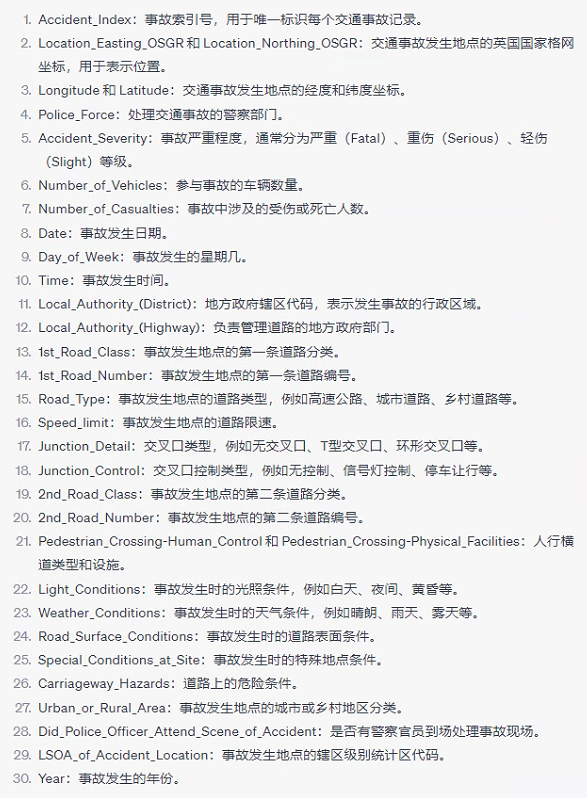

In [9]:
df.drop(["Accident_Index","Location_Easting_OSGR","Location_Northing_OSGR","Police_Force","Number_of_Vehicles","Number_of_Casualties","Local_Authority_(District)","Local_Authority_(Highway)","1st_Road_Class","1st_Road_Number","Junction_Detail","2nd_Road_Class","2nd_Road_Number","Pedestrian_Crossing-Human_Control","Pedestrian_Crossing-Physical_Facilities","Did_Police_Officer_Attend_Scene_of_Accident","LSOA_of_Accident_Location"],axis=1)

,Longitude,Latitude,Accident_Severity,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Year
0,-0.191170,51.489096,2,04/01/2005,3,17:42,Single carriageway,30,NaN,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,2005
1,-0.211708,51.520075,3,05/01/2005,4,17:36,Dual carriageway,30,Automatic traffic signal,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,2005
2,-0.206458,51.525301,3,06/01/2005,5,00:15,Single carriageway,30,NaN,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,2005
3,-0.173862,51.482442,3,07/01/2005,6,10:35,Single carriageway,30,NaN,Daylight: Street light present,Fine without high winds,Dry,None,None,1,2005
4,-0.156618,51.495752,3,10/01/2005,2,21:13,Single carriageway,30,NaN,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,-3.417278,55.264773,2,07/12/2014,1,22:20,Dual carriageway,70,NaN,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,2014
464693,-3.230255,55.054855,3,11/12/2014,5,06:40,Dual carriageway,70,NaN,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,2014
464694,-3.230826,54.985668,3,09/12/2014,3,02:00,Single carriageway,40,NaN,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,2014
464695,-3.191397,54.990446,2,17/12/2014,4,06:55,Single carriageway,60,Giveway or uncontrolled,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,2014


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [11]:
df.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,1504049.0,439621.405078,95116.160326,64950.000000,375060.000000,439960.000000,523060.000000,6.553700e+05
Location_Northing_OSGR,1504049.0,300158.403995,161008.382735,10290.000000,178260.000000,268830.000000,398151.000000,1.208800e+06
Longitude,1504049.0,-1.436625,1.398078,-7.516225,-2.373902,-1.403714,-0.221510,1.759398e+00
Latitude,1504049.0,52.589399,1.449889,49.912941,51.490156,52.309126,53.478581,6.075754e+01
Police_Force,1504150.0,30.205364,25.516033,1.000000,6.000000,30.000000,45.000000,9.800000e+01
Accident_Severity,1504150.0,2.838190,0.401842,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,1504150.0,1.831606,0.714759,1.000000,1.000000,2.000000,2.000000,6.700000e+01
Number_of_Casualties,1504150.0,1.350960,0.825335,1.000000,1.000000,1.000000,1.000000,9.300000e+01
Day_of_Week,1504150.0,4.118607,1.924405,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),1504150.0,347.614855,259.429163,1.000000,110.000000,322.000000,518.000000,9.410000e+02


<Figure size 648x648 with 0 Axes>

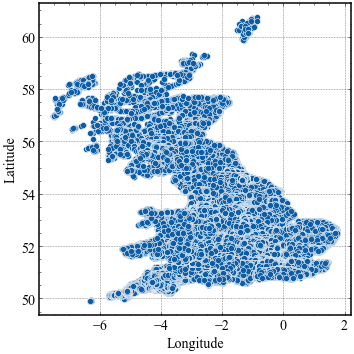

In [15]:
plt.figure(figsize=(9,9)) # 设定画布
sns.relplot(data=df,x="Longitude",y="Latitude")
sns.despine(top=False, right=False)
plt.savefig('../assets/figure/Location.tiff', bbox_inches='tight', dpi=600)
plt.show()

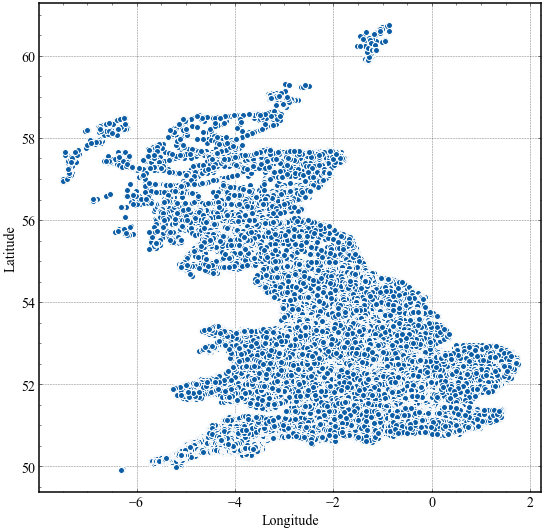

In [14]:
fig, ax = plt.subplots(1,1,figsize=(9,9)) # 设定画布
ax.scatter(df['Longitude'].values, df['Latitude'], edgecolors='white')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.savefig('../assets/figure/Location.tiff', bbox_inches='tight', dpi=600)
plt.show()

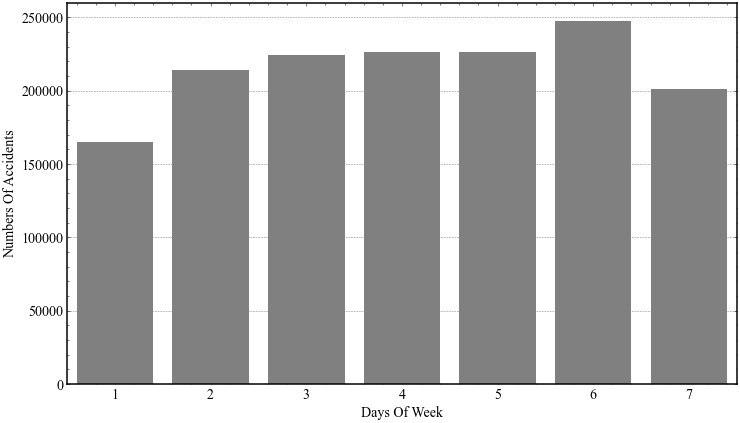

In [16]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,7))
sns.countplot(x="Day_of_Week",data=df, color='gray')
# plt.title("Number Of Accidents by Days Of Week")
plt.xlabel("Days Of Week")
plt.ylabel("Numbers Of Accidents")
plt.savefig('../assets/figure/Number Of Accidents by Days Of Week.svg', bbox_inches='tight')
plt.show()

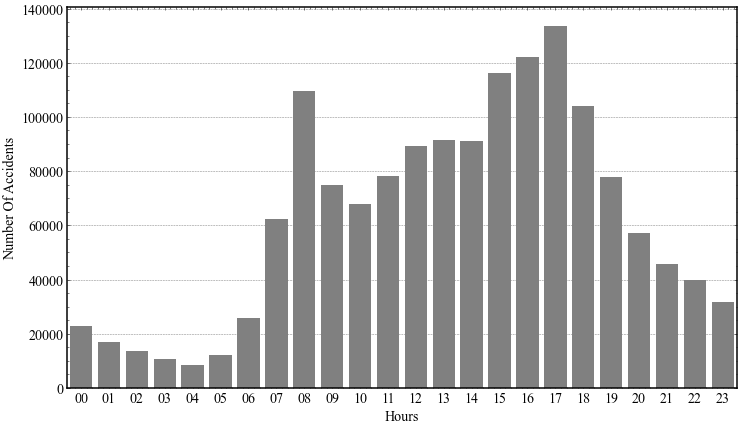

In [17]:
hours = pd.DataFrame(df["Time"].astype("datetime64"))
hours = pd.DataFrame(hours.Time.dt.strftime('%H').sort_values(),columns=["Time"])

plt.figure(figsize=(12,7))
sns.countplot(data=hours,x="Time", color='gray')
# plt.title("Number Of Accidents by Hours")
plt.xlabel("Hours")
plt.ylabel("Number Of Accidents")
plt.savefig('../assets/figure/Number Of Accidents by Hours.svg', bbox_inches='tight')
plt.show()

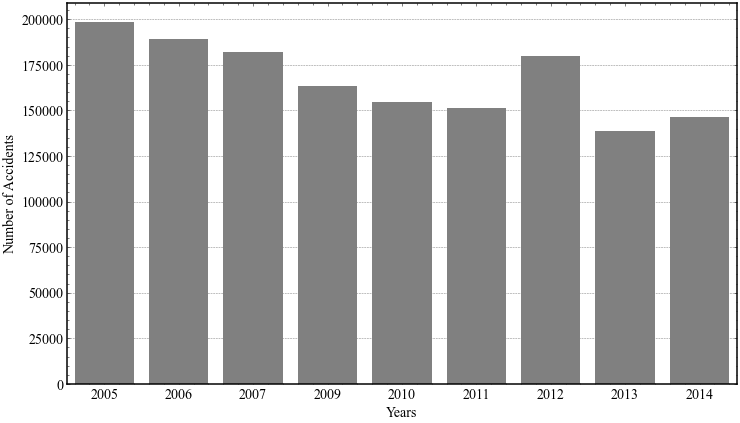

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(x="Year",data=df, color='gray')
# plt.title("Number of Accidents by Year")
plt.xlabel("Years")
plt.ylabel("Number of Accidents")
plt.savefig('../assets/figure/Number Of Accidents by Year.svg', bbox_inches='tight')
plt.show()

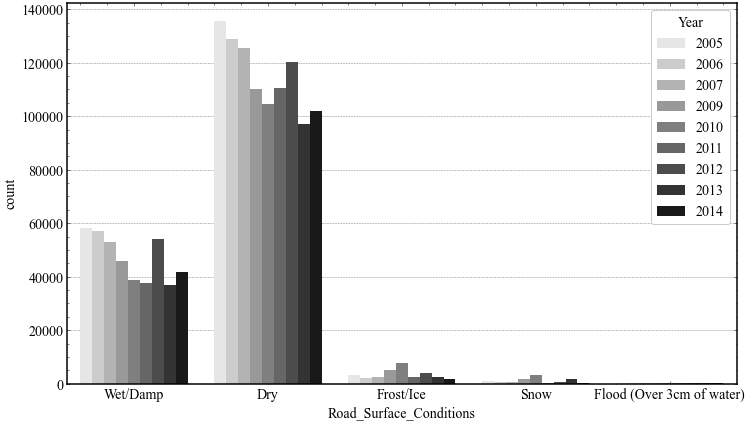

In [89]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="Road_Surface_Conditions",hue="Year",palette="binary")  # Greys
plt.savefig('../assets/figure/Road_Surface_Conditions.svg', bbox_inches='tight')
plt.show()

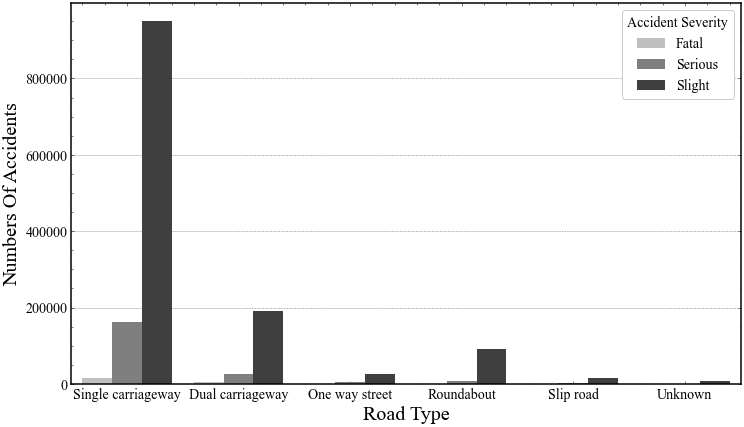

In [90]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="Road_Type",hue="Accident_Severity",palette="binary")
# plt.title("Accident Severity By Road Type",size=20)
plt.xlabel("Road Type",size=20)
plt.ylabel("Numbers Of Accidents",size=20)
plt.legend(title="Accident Severity",labels=["Fatal","Serious","Slight"])
plt.savefig('../assets/figure/Accident Severity By Road Type.svg', bbox_inches='tight')
plt.show()

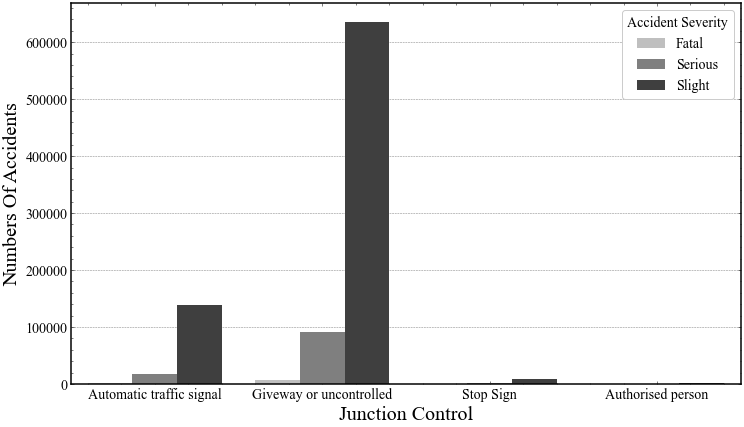

In [91]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="Junction_Control",hue="Accident_Severity",palette="binary")
# plt.title("Accident Severity By Junction Control",size=20)
plt.xlabel("Junction Control",size=20)
plt.ylabel("Numbers Of Accidents",size=20)
plt.legend(title="Accident Severity",labels=["Fatal","Serious","Slight"])
plt.savefig('../assets/figure/Accident Severity By Junction Control.svg', bbox_inches='tight')
plt.show()

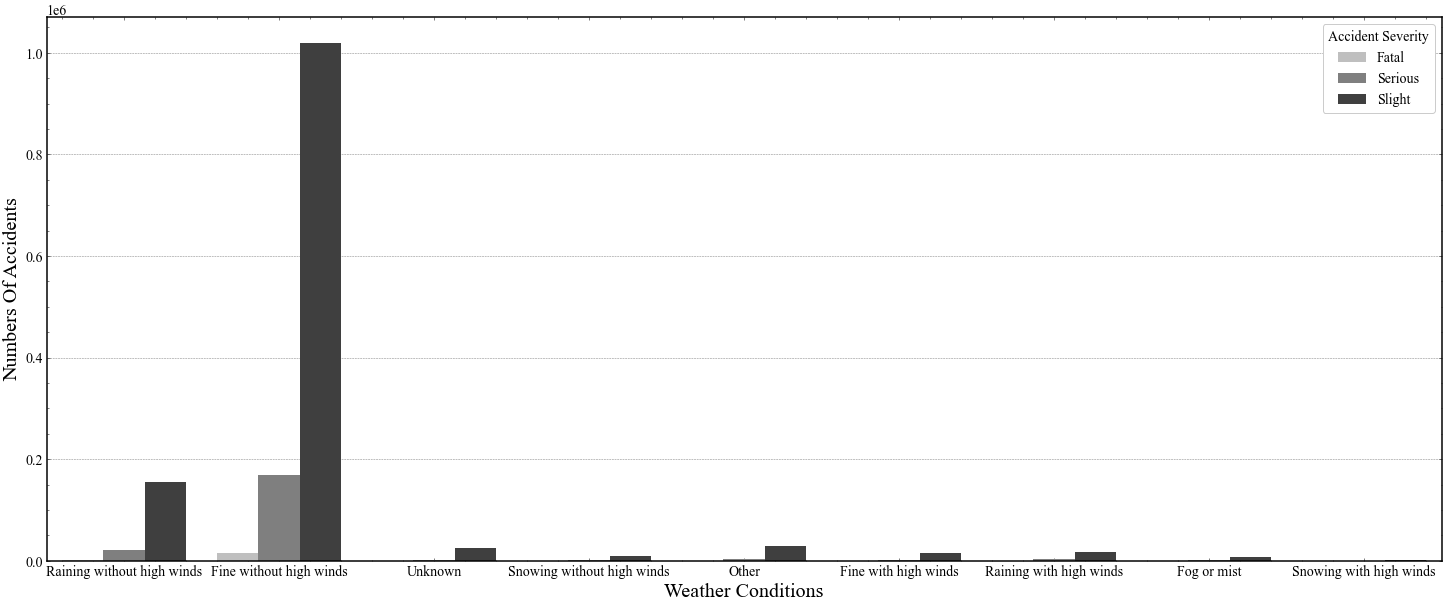

In [92]:
plt.figure(figsize=(25,10))
sns.countplot(data=df,x="Weather_Conditions",hue="Accident_Severity",palette="binary")
# plt.title("Accident Severity By Weather Conditions",size=20)
plt.xlabel("Weather Conditions",size=20)
plt.ylabel("Numbers Of Accidents",size=20)
plt.legend(title="Accident Severity",labels=["Fatal","Serious","Slight"])
plt.savefig('../assets/figure/Accident Severity By Weather Conditions.svg', bbox_inches='tight')
plt.show()

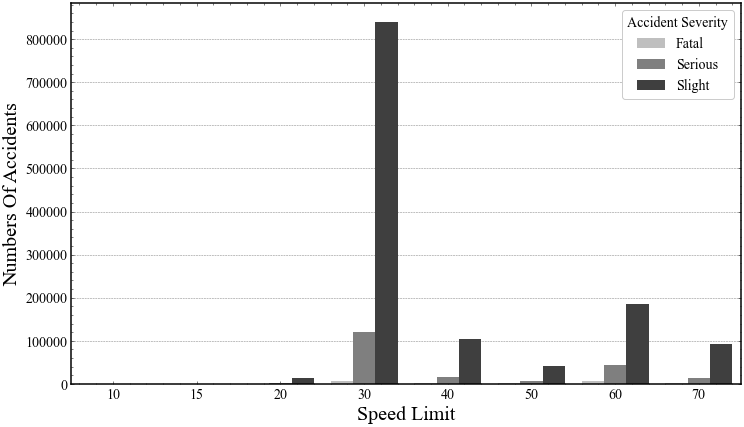

In [93]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="Speed_limit",hue="Accident_Severity",palette="binary")
# plt.title("Accident Severity By Speed Limit",size=20)
plt.xlabel("Speed Limit",size=20)
plt.ylabel("Numbers Of Accidents",size=20)
plt.legend(title="Accident Severity",labels=["Fatal","Serious","Slight"])
plt.savefig('../assets/figure/Accident Severity By Speed Limit.svg', bbox_inches='tight')
plt.show()

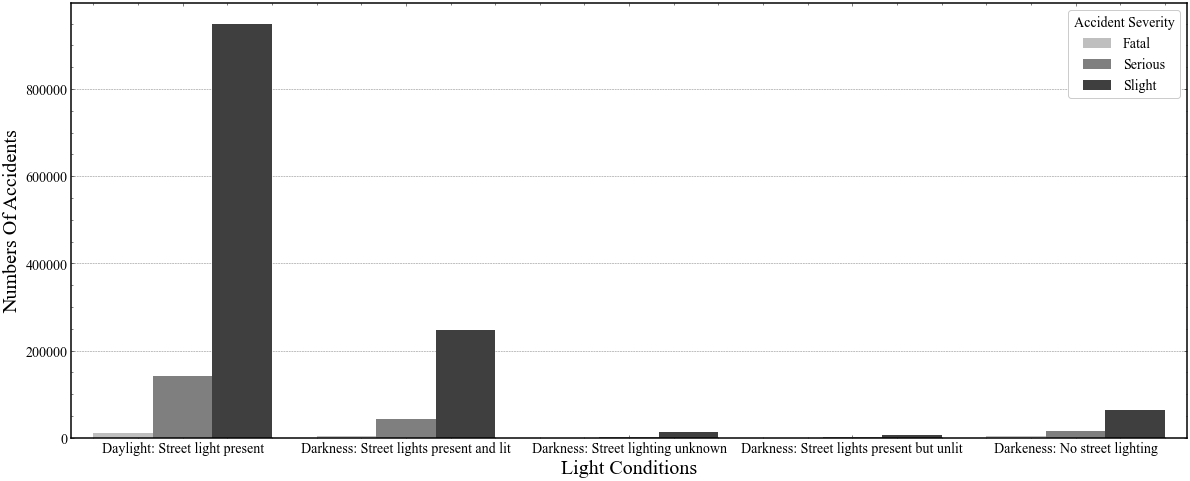

In [94]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x="Light_Conditions",hue="Accident_Severity",palette="binary")
# plt.title("Accident severity according to Light Conditions",size=20)
plt.xlabel("Light Conditions",size=20)
plt.ylabel("Numbers Of Accidents",size=20)
plt.legend(title="Accident Severity",labels=["Fatal","Serious","Slight"])
plt.savefig('../assets/figure/Accident severity according to Light Conditions.svg', bbox_inches='tight')
plt.show()

TypeError: pie() got an unexpected keyword argument 'color'

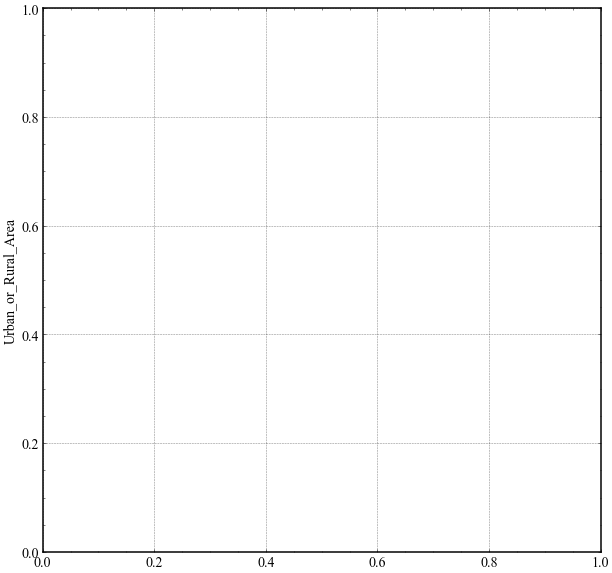

In [19]:
area = pd.DataFrame(df["Urban_or_Rural_Area"].value_counts())
area = area.drop([3])

area.plot.pie(y="Urban_or_Rural_Area",figsize=[10,10])
# plt.title("Accidents of Urban Or Rural")
plt.legend(title="Accidents of Urban Or Rural",labels=["Urban","Area"])
plt.savefig('../assets/figure/Accidents of Urban Or Rural.svg', bbox_inches='tight')
plt.show()